In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots pretty
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
df = pd.read_csv('property_rentals.csv')
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [4]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2222 non-null   int64  
 1   latitude        2222 non-null   float64
 2   longitude       2222 non-null   float64
 3   property_type   2222 non-null   object 
 4   room_type       2222 non-null   object 
 5   bathrooms       2211 non-null   float64
 6   bedrooms        2221 non-null   float64
 7   minimum_nights  2222 non-null   int64  
 8   price           2222 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 156.4+ KB


id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         11
bedrooms           1
minimum_nights     0
price              0
dtype: int64

In [6]:
# Strip $ sign, remove quotes and whitespace, then convert to float
df['price'] = df['price'].astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)

# Check if it's clean now
print(df['price'].head())


0    170.0
1     99.0
2    235.0
3     65.0
4     65.0
Name: price, dtype: float64


In [8]:
df['bedrooms'] = df['bedrooms'].fillna(0).astype(int)
df['bathrooms'] = df['bathrooms'].fillna(0).astype(int)
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].median())
df['room_type'] = df['room_type'].fillna('Unknown')



In [9]:
df.drop(columns=['id'], inplace=True)


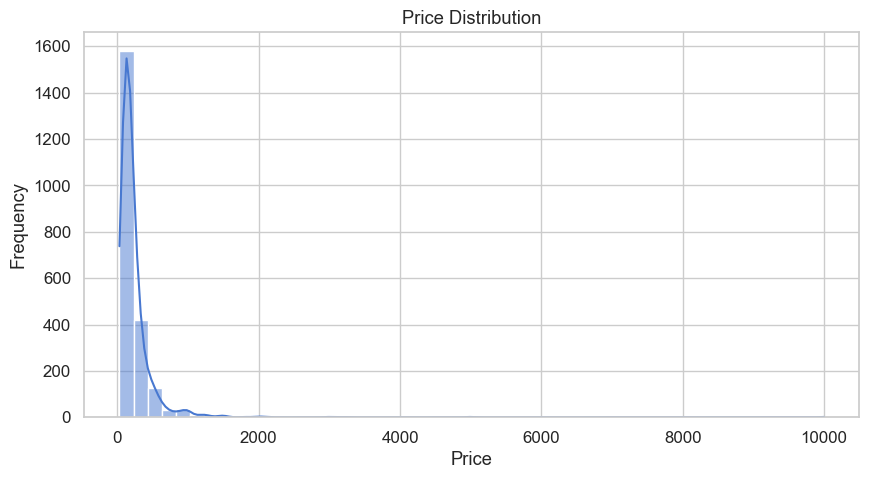

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


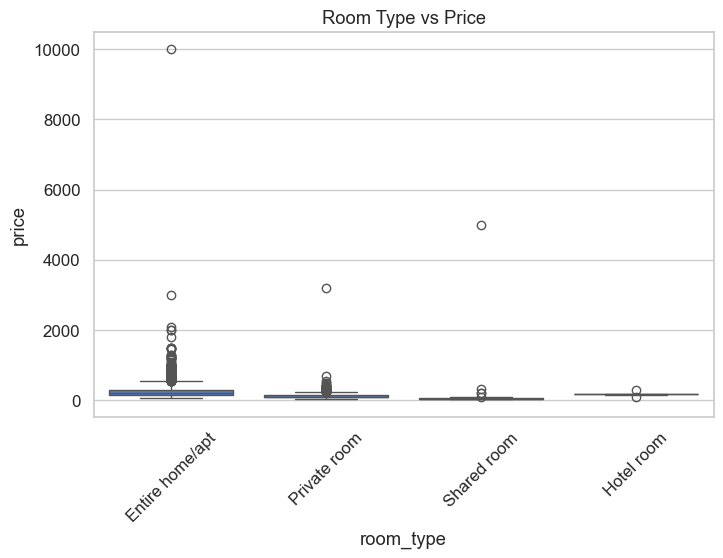

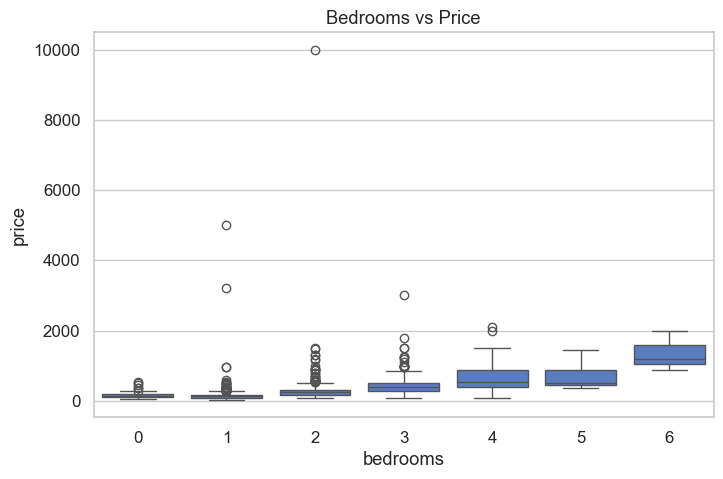

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Room Type vs Price")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Bedrooms vs Price")
plt.show()


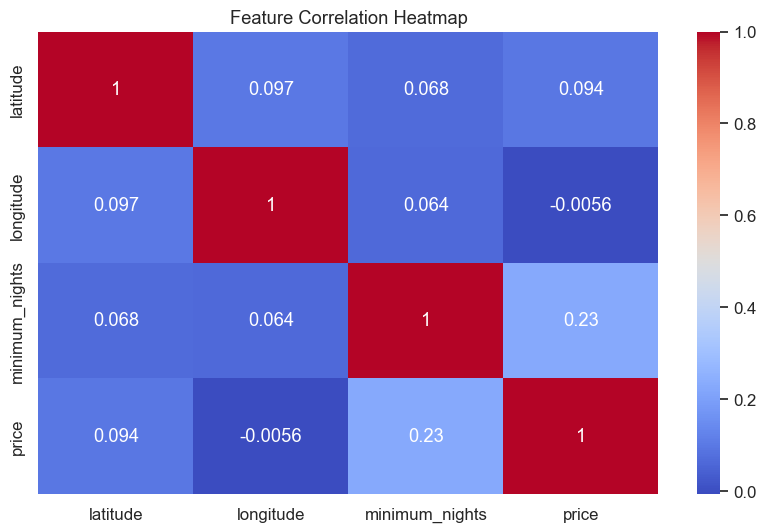

In [14]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
df.dtypes

latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms           int32
bedrooms            int32
minimum_nights      int64
price             float64
dtype: object

In [16]:
df.to_csv('cleaned_property_rentals.csv', index=False)